### Notebook to explore SITRACK outputs

In [1]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import animation
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from IPython.display import HTML

import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#JUPYTER notebook magics
%matplotlib inline 

* define a function for later use (plotting purposes)

In [2]:
def Fnospines(ax,pspines=False,paxis='off'):
    """
    Remove spines from around the plot
    
    Return: (ax)
    """
    ax.spines['top'].set_visible(pspines)
    ax.spines['right'].set_visible(pspines)
    ax.spines['bottom'].set_visible(pspines)
    ax.spines['left'].set_visible(pspines)
    ax.axis(paxis)

---
## 2. Plot using geographic projection

* Create map over arctic region without data

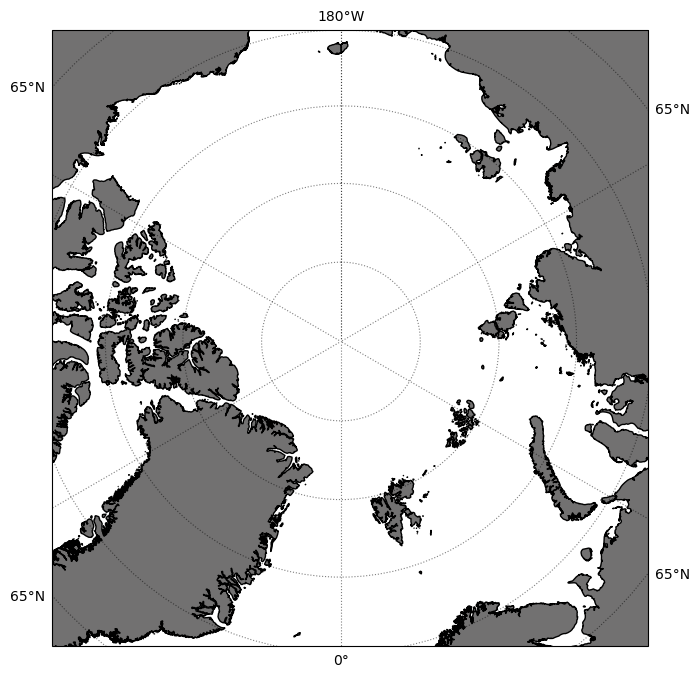

In [3]:
#========= CREATE FIGURE
fig3 = plt.figure(figsize=([8,8]),facecolor='white')

#========= PLOT DATA
# Data system proj (if coords are in lat lon, use PlateCarre here)
trdata  = ccrs.PlateCarree() 

# Now use Orthographic projection over Arctic region
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0)) 
ax.set_extent([-180, 180, 70, 90], trdata)

# continents
land = cfeature.GSHHSFeature(scale='intermediate',
                                     levels=[1],
                                     facecolor='#727171')
#land = cfeature.GSHHSFeature(scale='intermediate',
#                                     levels=[1],
#                                     facecolor=cfeature.COLORS['sea'])
ax.add_feature(land)

# gridlines
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

# function to make sure there is no spurious frame around the plot
Fnospines(ax,pspines=False,paxis='on')


# Read the seed file

In [5]:
diridat = "/Users/leroux/WORK/DEV/sitrack/tools/nc/"
fili    = "sitrack_seeding_nemoTsi3_19961215_00_HSS5.nc"

seed = xr.open_dataset(diridat+fili)
seed

<xarray.Dataset>
Dimensions:    (time: 1, buoy: 1002)
Coordinates:
  * time       (time) datetime64[ns] 1996-12-15
  * buoy       (buoy) int32 0 1 2 3 4 5 6 7 ... 995 996 997 998 999 1000 1001
Data variables:
    id_buoy    (buoy) int32 ...
    latitude   (time, buoy) float32 ...
    longitude  (time, buoy) float32 ...
    y_pos      (time, buoy) float32 ...
    x_pos      (time, buoy) float32 ...
Attributes:
    Origin:   idealized_seeding
    About:    Lagrangian sea-ice drift
    Author:   Generated with `generate_idealized_seeding.py` of `sitrack` (L....

# Plot the seeds at initial time

/Users/leroux/anaconda3/envs/jupy/lib/python3.11/site-packages/cartopy/mpl/geoaxes.py:1700: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  result = super().scatter(*args, **kwargs)


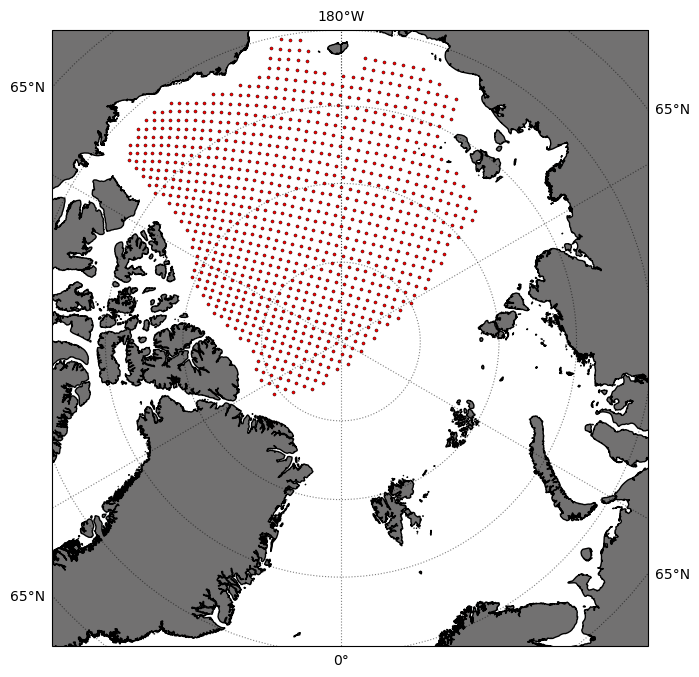

In [6]:
#========= CREATE FIGURE
fig3 = plt.figure(figsize=([8,8]),facecolor='white')

#========= PLOT DATA
# Data system proj (if coords are in lat lon, use PlateCarre here)
trdata  = ccrs.PlateCarree() 

# Now use Orthographic projection over Arctic region
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0)) 
ax.set_extent([-180, 180, 70, 90], trdata)

# continents
land = cfeature.GSHHSFeature(scale='intermediate',
                                     levels=[1],
                                     facecolor='#727171')
#land = cfeature.GSHHSFeature(scale='intermediate',
#                                     levels=[1],
#                                     facecolor=cfeature.COLORS['sea'])
ax.add_feature(land)

# gridlines
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                          alpha=0.5)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
ax.tick_params('both',labelsize=22)

# function to make sure there is no spurious frame around the plot
Fnospines(ax,pspines=False,paxis='on')

lonpt=seed.longitude.values
latpt=seed.latitude.values


# plot scattered points (no line in between)
traj=plt.scatter(x=lonpt,
               y=latpt,
               alpha=1, 
               s=20,
            linewidths=0.3,
            marker='.',
            facecolors='r', 
            edgecolors='k',
            transform=trdata,
            cmap='inferno_r',
            zorder=20) 


In [7]:
diridat2 = "/Users/leroux/WORK/DEV/sitrack/nc/"
fili2    = "NEMO-SI3_NANUK4_BBM23U06_tracking_nemoTsi3_idlSeed_19961215h00_19970421h00.nc"

seed = xr.open_dataset(diridat2+fili2)
seed

<xarray.Dataset>
Dimensions:    (time: 3049, buoy: 1002)
Coordinates:
  * time       (time) datetime64[ns] 1996-12-15 ... 1997-04-21
  * buoy       (buoy) int32 0 1 2 3 4 5 6 7 ... 995 996 997 998 999 1000 1001
Data variables:
    id_buoy    (buoy) int32 ...
    latitude   (time, buoy) float32 ...
    longitude  (time, buoy) float32 ...
    y_pos      (time, buoy) float32 ...
    x_pos      (time, buoy) float32 ...
    mask       (time, buoy) int8 ...
Attributes:
    Origin:   NEMO-SI3_NANUK4_BBM23U06
    About:    Lagrangian sea-ice drift
    Author:   Generated with `si3_part_tracker.py` of `sitrack` (L. Brodeau, ...